In [15]:
import pandas as pd

import scipy

import numpy as np

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

import matplotlib.pyplot as plt

In [16]:
#load dataset yang diimport file csv

df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [17]:
#mengecek informasi data di file csv

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
#memastikan data null yang ada pada dataset

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
#deskripsi dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


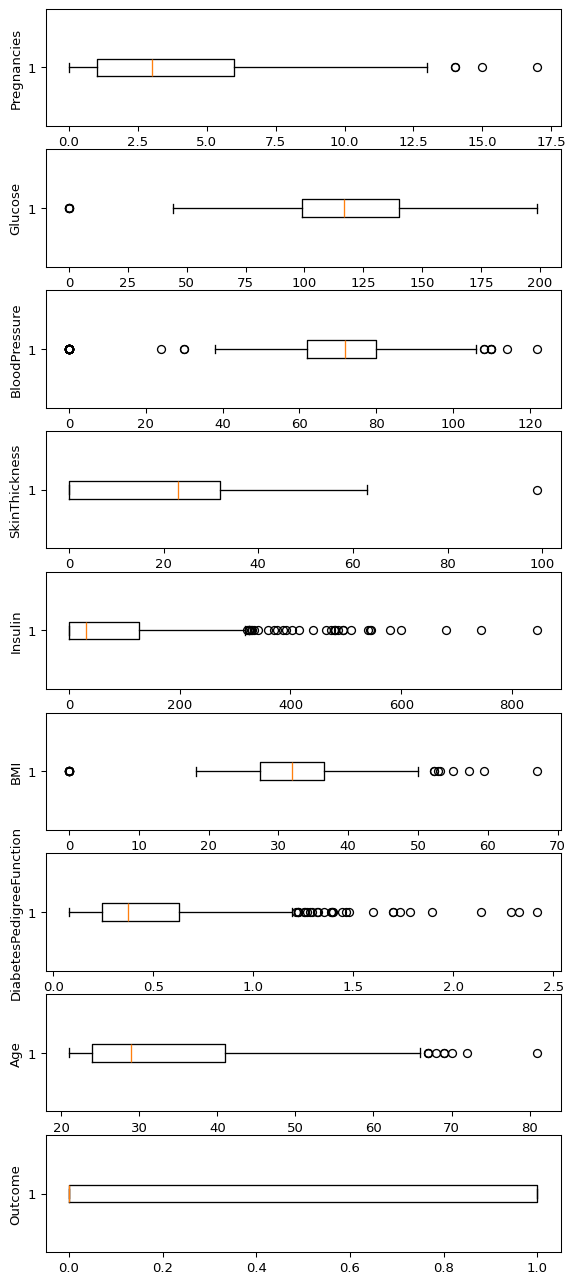

In [20]:
#mengetahui data outlier atau nilai ekstrim
#boxplot

fig, axs =plt.subplots(9,1,dpi=95,figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [24]:
#identify quartiles
q1, q3 = np.percentile(df['Insulin'], [25, 75])

#calculate the interquartil range
iqr = q3 - q1

#calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

#drop the outliers
clean_data = df[(df['Insulin'] >= lower_bound)
                & (df['Insulin'] <= upper_bound)]

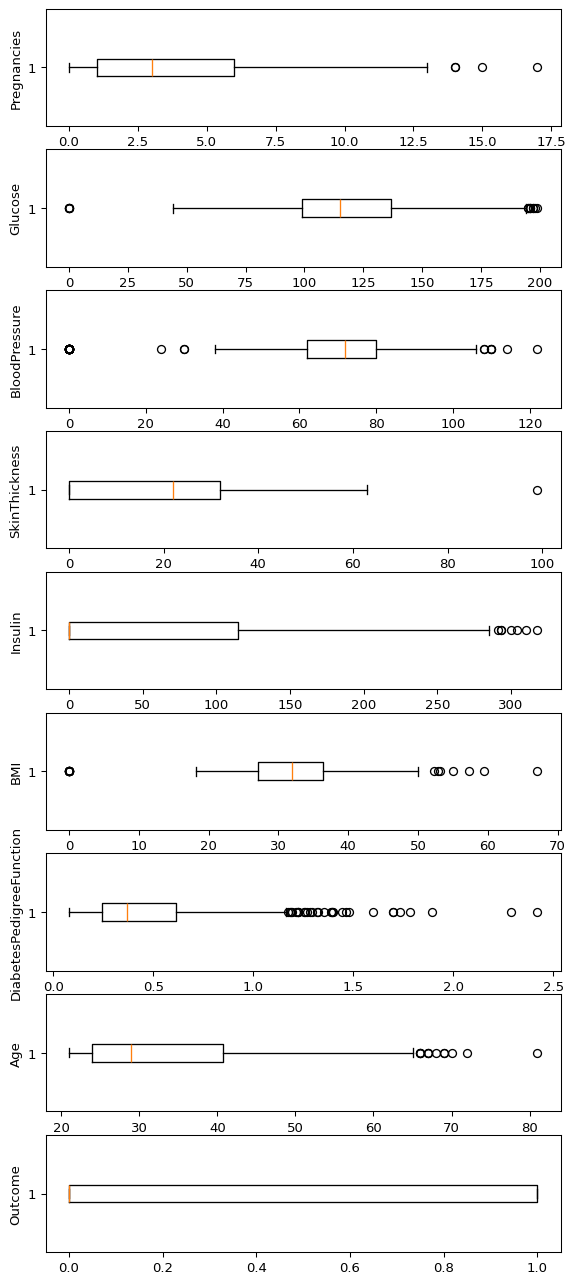

In [25]:
#clean data for insulin

fig, axs =plt.subplots(9,1,dpi=95,figsize=(7,17))
i = 0
for col in clean_data.columns:
    axs[i].boxplot(clean_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [26]:
#identify quartiles
q1, q3 = np.percentile(clean_data['Pregnancies'], [25, 75])

#calculate the interquartil range
iqr = q3 - q1

#calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

#drop the outliers
clean_data = clean_data[(clean_data['Pregnancies'] >= lower_bound)
                & (clean_data['Pregnancies'] <= upper_bound)]

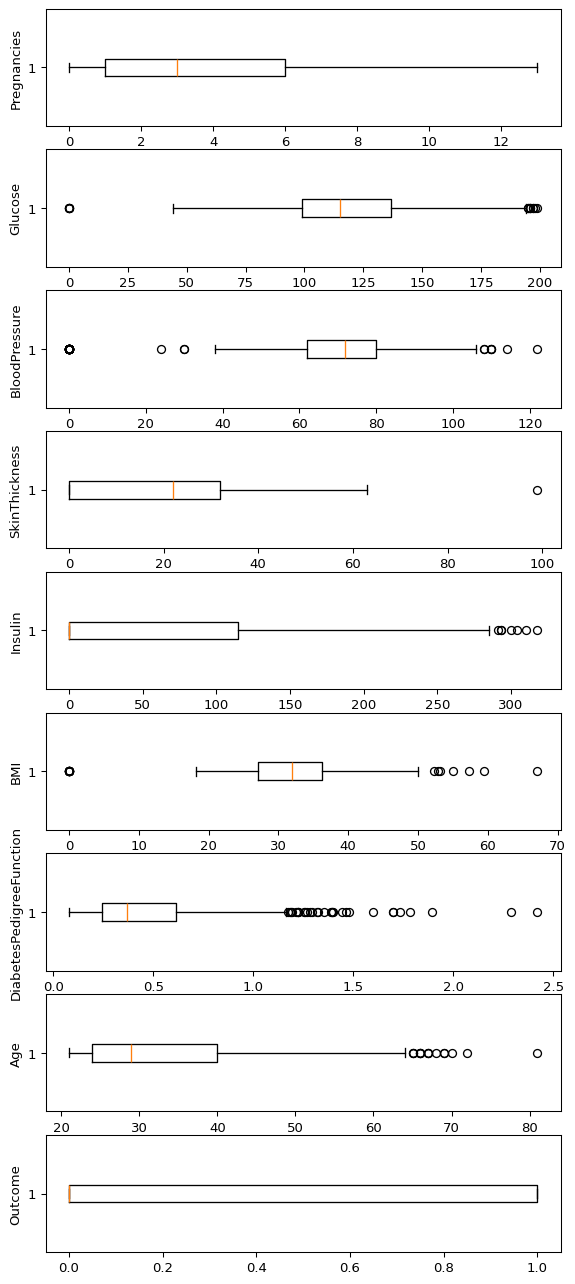

In [27]:
#clean data for pregnancies

fig, axs =plt.subplots(9,1,dpi=95,figsize=(7,17))
i = 0
for col in clean_data.columns:
    axs[i].boxplot(clean_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

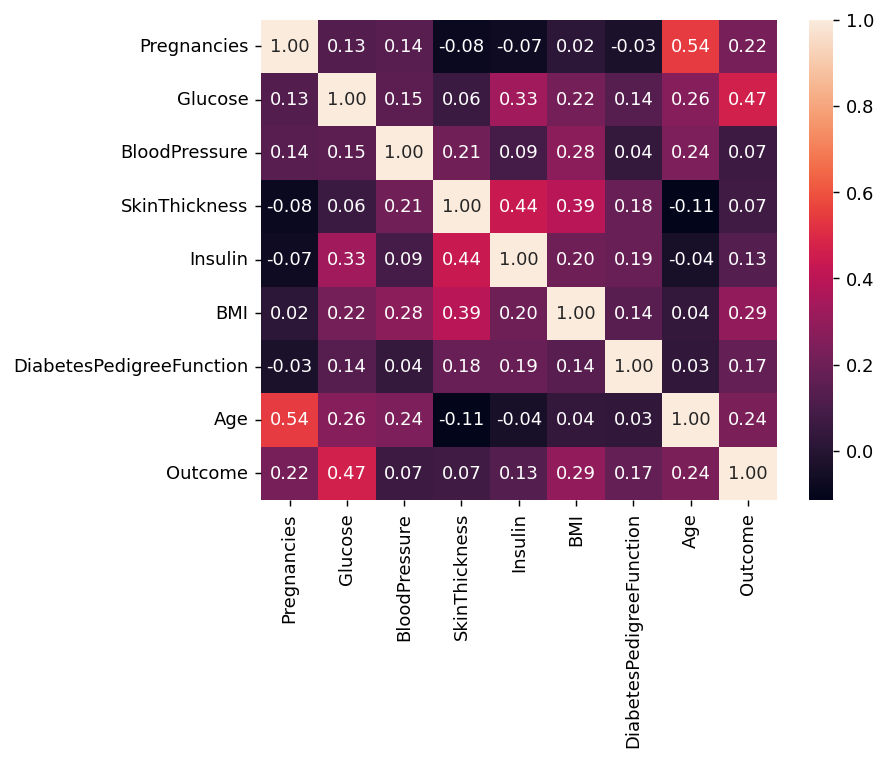

In [ ]:
#uji korelasi informasi atribut yang berpengaruh
#plot berbentuk heatmap

corr = df.corr()
plt.figure(dpi=130)
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

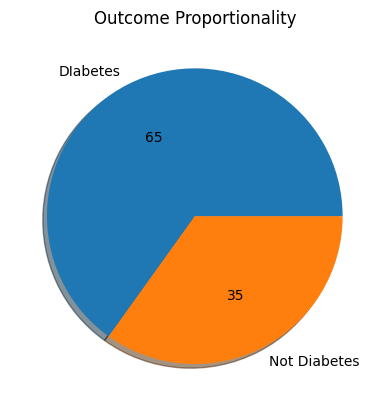

In [ ]:
#plot berbentuk grafik

plt.pie(df.Outcome.value_counts(),
        labels= ['DIabetes', 'Not Diabetes'],
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()